# Análisis de los datos recopilados durante el Experimento 2

Dentro de este experimento se busca validar las ideas de arquitectura relacionadas con la implementacion de la táctica de *__Validacion de la integridad de los mensajes__* para favorecer el atributo de calidad de seguridad para la *__Deteccion de ataques__*. 

Se ha configurado NGINX como API Gateway, donde esta se encarga de re-dirigir los mensajes al componente *validador* para que se encargue de verificar la integridad de los mensajes mediante el uso de la tactica HMAC y el algoritmo de criptografia SHA-256.

Para mockear el comportamiento del microservicio de inventario bajo fallas, se ha configurado un cliente que se encargara de realizar 300 peticiones teniendo un total de 241 peticiones con un hash valido y 59 con un hash invalido, donde se espera obtener un 100% de deteccion de ambos casos.

In [2]:
# Instalacion de las bibliotecas necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Estructura del dataset

- __ID__: UUID de la peticion realizada
- __start__: Estampilla de tiempo con el inicio de la peticion 
- __end__: Estampilla de tiempo con el momento donde se recibio una respuesta
- __Delta__: Tiempo transcurrido entre el tiempo de inicio y de fin (end-start)
- __valid_content__: Si la peticion contaba con un hash valido (true), o si contaba con uno invalid (false)
- __status__: Estado de la respuesta donde 200 (o True) indica un correcto, mientras que, 400 (os)

## Analisis de los datos del validador

Durante esta seccion, se van a analizar los datos recibidos del componente de validador, que es el encargado de recibir los mensajes de los microservicios por parte del API Gatewat para validar la integridad de sus mensajes

In [3]:
df_validador = pd.read_csv('resultados_validator.csv')
df_validador

,id,start,end,delta,valid_content,status
0,8569ae3a-b30f-4374-b115-8ab83c3193d9,2025-03-15 22:18:16.860739,2025-03-15 22:18:16.875881,15142,True,Forwarded with status 200
1,9cb45068-0e15-4da9-8632-4c299bae4230,2025-03-15 22:18:17.189171,2025-03-15 22:18:17.198955,9784,True,Forwarded with status 200
2,1cadb75d-2dca-45b0-8bf4-87f72aaa6c60,2025-03-15 22:18:17.510591,2025-03-15 22:18:17.511819,1228,False,400 Invalid hash
3,386852a1-d4ad-4382-975f-e35e46ec73af,2025-03-15 22:18:17.823475,2025-03-15 22:18:17.824954,1479,False,400 Invalid hash
4,8caf40d6-d8ef-428f-ae52-572c04477f1c,2025-03-15 22:18:18.136582,2025-03-15 22:18:18.138110,1528,False,400 Invalid hash
...,...,...,...,...,...,...
295,54fd7c54-20cd-436f-aa41-59d567558f77,2025-03-15 22:19:51.110947,2025-03-15 22:19:51.120487,9540,True,Forwarded with status 200
296,de604adb-9e60-49c1-8ed3-8c0fe25d1c44,2025-03-15 22:19:51.430934,2025-03-15 22:19:51.440602,9668,True,Forwarded with status 200
297,af7dcb97-f226-4e95-a12a-12e0ac3e3dda,2025-03-15 22:19:51.751745,2025-03-15 22:19:51.760210,8465,True,Forwarded with status 200
298,40fc61f6-3723-4770-8158-1312f843bd3a,2025-03-15 22:19:52.075535,2025-03-15 22:19:52.085582,10047,True,Forwarded with status 200


Primeramente, eliminamos las columnas que no agreguen ningun valor al analisis de los datos, como lo son la columna de 'id', 'start' y 'end'

In [4]:
df_validador = df_validador.drop(columns=['id', 'start', 'end'])
df_validador


,delta,valid_content,status
0,15142,True,Forwarded with status 200
1,9784,True,Forwarded with status 200
2,1228,False,400 Invalid hash
3,1479,False,400 Invalid hash
4,1528,False,400 Invalid hash
...,...,...,...
295,9540,True,Forwarded with status 200
296,9668,True,Forwarded with status 200
297,8465,True,Forwarded with status 200
298,10047,True,Forwarded with status 200


Posteriormente, determinamos la cantidad de peticiones con un hash correcto y con un hash invalido

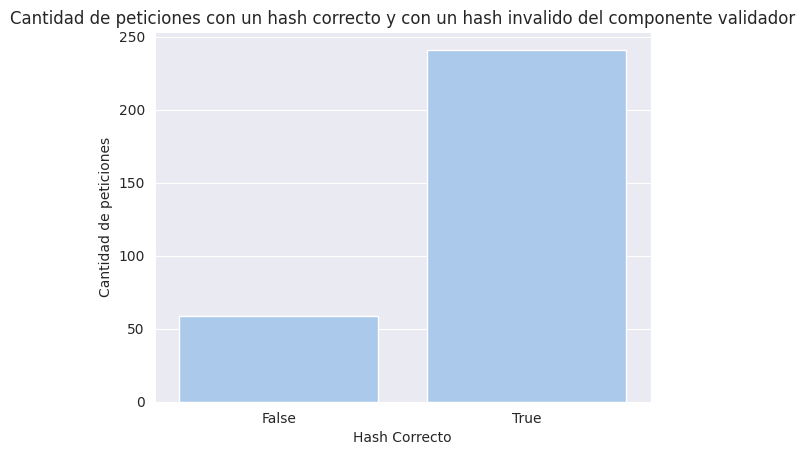

In [5]:
counting = df_validador['valid_content'].value_counts()

sns.set_style("darkgrid") 
sns.set_palette("pastel") 

sns.barplot(data=counting)

plt.xlabel('Hash Correcto')
plt.ylabel('Cantidad de peticiones')
plt.title('Cantidad de peticiones con un hash correcto y con un hash invalido del componente validador')
plt.show()

## Analisis de los datos del cliente

Durante esta seccion, se van a analizar los datos recibidos del componente de cliente, que es el encargado de realizar las solicitudes al microservicio de Inventario

In [6]:
df_cliente = pd.read_csv('resultados_client.csv')
df_cliente

,id,start,end,delta,valid_content,status
0,8569ae3a-b30f-4374-b115-8ab83c3193d9,2025-03-15T22:18:16.849383,2025-03-15T22:18:16.879590,30207,True,True
1,9cb45068-0e15-4da9-8632-4c299bae4230,2025-03-15T22:18:17.180732,2025-03-15T22:18:17.202051,21319,True,True
2,1cadb75d-2dca-45b0-8bf4-87f72aaa6c60,2025-03-15T22:18:17.502930,2025-03-15T22:18:17.514996,12066,False,False
3,386852a1-d4ad-4382-975f-e35e46ec73af,2025-03-15T22:18:17.815856,2025-03-15T22:18:17.827983,12127,False,False
4,8caf40d6-d8ef-428f-ae52-572c04477f1c,2025-03-15T22:18:18.129024,2025-03-15T22:18:18.141674,12650,False,False
...,...,...,...,...,...,...
295,54fd7c54-20cd-436f-aa41-59d567558f77,2025-03-15T22:19:51.105016,2025-03-15T22:19:51.123346,18330,True,True
296,de604adb-9e60-49c1-8ed3-8c0fe25d1c44,2025-03-15T22:19:51.424295,2025-03-15T22:19:51.443369,19074,True,True
297,af7dcb97-f226-4e95-a12a-12e0ac3e3dda,2025-03-15T22:19:51.744077,2025-03-15T22:19:51.763202,19125,True,True
298,40fc61f6-3723-4770-8158-1312f843bd3a,2025-03-15T22:19:52.064236,2025-03-15T22:19:52.088952,24716,True,True


Primeramente, eliminamos las columnas que no agreguen ningun valor al analisis de los datos, como lo son la columna de 'id', 'start' y 'end'

In [7]:
df_cliente = df_cliente.drop(columns=['id', 'start', 'end'])
df_cliente

,delta,valid_content,status
0,30207,True,True
1,21319,True,True
2,12066,False,False
3,12127,False,False
4,12650,False,False
...,...,...,...
295,18330,True,True
296,19074,True,True
297,19125,True,True
298,24716,True,True


Posteriormente, determinamos la cantidad de peticiones con un hash correcto y con un hash invalido

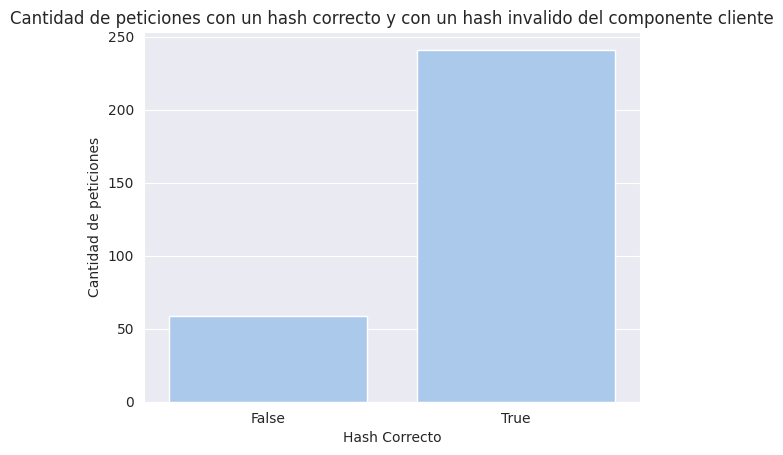

In [8]:
counting = df_cliente['valid_content'].value_counts()

sns.set_style("darkgrid") 
sns.set_palette("pastel") 

sns.barplot(data=counting)

plt.xlabel('Hash Correcto')
plt.ylabel('Cantidad de peticiones')
plt.title('Cantidad de peticiones con un hash correcto y con un hash invalido del componente cliente')
plt.show()

Si realizamos una comparacion de ambos servicios, podemos ver que todas las peticiones fueron detectadas de manera correcta, si comparamos la cantidad de peticiones incorrectas realizadas por el cliente, deben ser las mismas detectadas por el validaor.

In [9]:
counting_cliente = df_cliente['valid_content'].value_counts()
counting_validador = df_validador['valid_content'].value_counts()

In [10]:
misma_cantidad_de_peticiones_erroneas = counting_validador.get('False') == counting_cliente.get('False')
f"La cantidad de peticiones erroneas es la misma: {misma_cantidad_de_peticiones_erroneas}"

'La cantidad de peticiones erroneas es la misma: True'

In [11]:
misma_cantidad_de_peticiones_correctas = counting_validador.get('True') == counting_cliente.get('True')
f"La cantidad de peticiones correctas es la misma: {misma_cantidad_de_peticiones_correctas}"

'La cantidad de peticiones correctas es la misma: True'